In [16]:
!pip install keras==2.2.5
!pip install tensorflow==1.14.0
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.2.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.

In [17]:
from keras.optimizers import RMSprop 

In [62]:

import warnings

import tensorflow as tf
import keras

warnings.simplefilter("ignore")

print(tf.__version__)
print(keras.__version__)

2.9.2
2.9.0


In [45]:
!pip install icrawler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from icrawler.builtin import BingImageCrawler

crawler = BingImageCrawler(storage={"root_dir": "ryuhei"})
crawler.crawl(keyword="丸山隆平", max_num=100)

INFO:icrawler.crawler:start crawling...
2023-01-09 13:36:12.325 INFO    icrawler.crawler: start crawling...
INFO:icrawler.crawler:starting 1 feeder threads...
2023-01-09 13:36:12.333 INFO    icrawler.crawler: starting 1 feeder threads...
INFO:feeder:thread feeder-001 exit
2023-01-09 13:36:12.341 INFO    feeder: thread feeder-001 exit
INFO:icrawler.crawler:starting 1 parser threads...
2023-01-09 13:36:12.341 INFO    icrawler.crawler: starting 1 parser threads...
INFO:icrawler.crawler:starting 1 downloader threads...
2023-01-09 13:36:12.352 INFO    icrawler.crawler: starting 1 downloader threads...
INFO:parser:parsing result page https://www.bing.com/images/async?q=丸山隆平&first=0
2023-01-09 13:36:12.723 INFO    parser: parsing result page https://www.bing.com/images/async?q=丸山隆平&first=0
INFO:downloader:skip downloading file 000001.jpg
2023-01-09 13:36:12.784 INFO    downloader: skip downloading file 000001.jpg
INFO:downloader:skip downloading file 000002.jpg
2023-01-09 13:36:12.794 INFO   

In [47]:
from icrawler.builtin import BingImageCrawler

crawler = BingImageCrawler(storage={"root_dir": "you"})
crawler.crawl(keyword="横山裕", max_num=100)

INFO:icrawler.crawler:start crawling...
2023-01-09 13:36:22.808 INFO    icrawler.crawler: start crawling...
INFO:icrawler.crawler:starting 1 feeder threads...
2023-01-09 13:36:22.827 INFO    icrawler.crawler: starting 1 feeder threads...
INFO:feeder:thread feeder-001 exit
2023-01-09 13:36:22.851 INFO    feeder: thread feeder-001 exit
INFO:icrawler.crawler:starting 1 parser threads...
2023-01-09 13:36:22.852 INFO    icrawler.crawler: starting 1 parser threads...
INFO:icrawler.crawler:starting 1 downloader threads...
2023-01-09 13:36:22.875 INFO    icrawler.crawler: starting 1 downloader threads...
INFO:parser:parsing result page https://www.bing.com/images/async?q=横山裕&first=0
2023-01-09 13:36:23.329 INFO    parser: parsing result page https://www.bing.com/images/async?q=横山裕&first=0
INFO:downloader:skip downloading file 000001.jpg
2023-01-09 13:36:24.634 INFO    downloader: skip downloading file 000001.jpg
INFO:downloader:skip downloading file 000002.jpg
2023-01-09 13:36:24.643 INFO    d

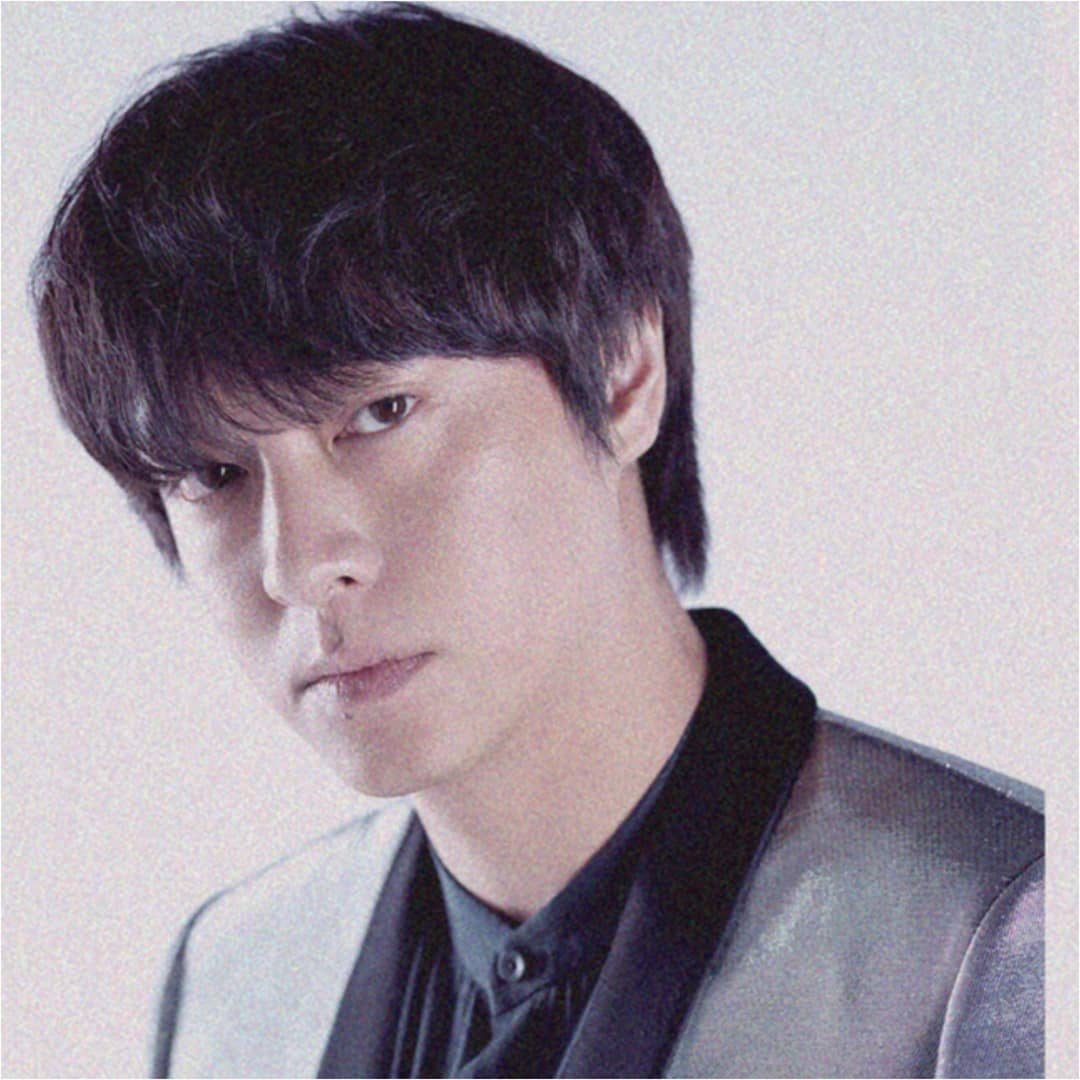

In [23]:
from IPython.display import Image,display_jpeg
display_jpeg(Image("./ryuhei/000001.jpg"))

In [24]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True

# indexを教師ラベルとして割り当てるため、0にはdogを指定し、1には猫を指定
classes = ["you", "ryuhei"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
y_train = []
y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:

            # angleに代入される値
            # -20
            # -15
            # -10
            #  -5
            # 0
            # 5
            # 10
            # 15
            # 画像を5度ずつ回転
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)
                # FLIP_LEFT_RIGHT　は 左右反転
                img_trains = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trains)
                X_train.append(data)
                y_train.append(index) # indexを教師ラベルとして割り当てるため、0にはdogを指定し、1には猫を指定

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./you_ryuhei.npy", xy)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop # TensorFlow1系
# from keras.optimizers import RMSprop # エラー（ImportError: cannot import name 'RMSprop' from 'keras.optimizers' (/usr/local/lib/python3.7/dist-packages/keras/optimizers.py)）が発生
# from tensorflow.keras.optimizers import RMSprop # TensorFlow2系

from keras.utils import np_utils
import keras
import numpy as np

# indexを教師ラベルとして割り当てるため、0にはdogを指定し、1には猫を指定
classes = ["you", "ryuhei"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./you_ryuhei.npy", allow_pickle=True)
    # 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    # to_categorical()にてラベルをone hot vector化
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()

    # Xは(1200, 64, 64, 3)
    # X.shape[1:]とすることで、(64, 64, 3)となり、入力にすることが可能です。
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2)) 
    model.add(Activation('softmax'))

    # https://keras.io/ja/optimizers/
    # 今回は、最適化アルゴリズムにRMSpropを利用
    opt = RMSprop(lr=0.00005, decay=1e-6)
    # https://keras.io/ja/models/sequential/
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    # HDF5ファイルにKerasのモデルを保存
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()    

Epoch 1/40


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
59/59 [==============================] - 36s 576ms/step - loss: 0.6705 - accuracy: 0.5916
Epoch 2/40
59/59 [==============================] - 34s 566ms/step - loss: 0.6162 - accuracy: 0.6881
Epoch 3/40
59/59 [==============================] - 32s 548ms/step - loss: 0.5705 - accuracy: 0.7233
Epoch 4/40
59/59 [==============================] - 34s 573ms/step - loss: 0.5403 - accuracy: 0.7427
Epoch 5/40
59/59 [==============================] - 33s 551ms/step - loss: 0.5184 - accuracy: 0.7512
Epoch 6/40
59/59 [==============================] - 33s 552ms/step - loss: 0.4831 - accuracy: 0.7688
Epoch 7/40
59/59 [==============================] - 33s 558ms/

In [36]:
!wget -O "000021.jpg"　
from google.colab import files
uploaded = files.upload()

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


Saving 000021.jpg to 000021 (2).jpg


In [38]:
import keras
import sys, os
import numpy as np
from PIL import Image
from keras.models import load_model

imsize = (64, 64)

"""
dog1.jpgというファイル名の画像をGoogle Colab上にアップロードする方法は2通りあります。
1つが、下記のコードを実行し画像をアップロードする方法
from google.colab import files
uploaded = files.upload()
2つが、Colab左メニューの>アイコンを押して、目次、コード スニペット、ファイル
の3つ表示されるますが、右のファイルタブから画像をアップロードする方法です。
このファイルタブをクリックするとアップロードと更新の2つがありますが、
アップロードを押すと画像をアップロードすることが可能です。
"""

testpic     = "./000021.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = load_model(keras_param)
img = load_image(testpic)
prd = model.predict(np.array([img]))
print(prd) # 精度の表示
prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> 横山裕")
elif prelabel == 1:
    print(">>> 丸山隆平")

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f25edec2160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f25edec2160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 102ms/step
[[3.9536861e-04 9.9960464e-01]]
>>> 丸山隆平


In [63]:
%%writefile ryuheioryou.py
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image

classes_ja = ["丸山隆平", "横山裕"]
classes_en = ["ryuhei", "you"]
n_class = len(classes_ja)
img_size = 32

# CNNのモデル
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

def predict(img):
    # モデルへの入力
    img = img.convert("RGB")
    img = img.resize((img_size, img_size))
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))  # 平均値を0、標準偏差を1に
                                ])
    img = transform(img)
    x = img.reshape(1, 3, img_size, img_size)

    # 訓練済みモデル
    net = Net()
    net.load_state_dict(torch.load(
        "model_cnn.pth", map_location=torch.device("cpu")
        ))
    
    # 予測
    net.eval()
    y = net(x)

    # 結果を返す
    y_prob = torch.nn.functional.softmax(torch.squeeze(y))  # 確率で表す
    sorted_prob, sorted_indices = torch.sort(y_prob, descending=True)  # 降順にソート
    return [(classes_ja[idx], classes_en[idx], prob.item()) for idx, prob in zip(sorted_indices, sorted_prob)]


Writing ryuheioryou.py


In [64]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
from model import predict

st.set_option("deprecation.showfileUploaderEncoding", False)

st.sidebar.title("画像認識アプリ")
st.sidebar.write("オリジナルの画像認識モデルを使って何の画像かを判定します。")

st.sidebar.write("")

img_source = st.sidebar.radio("画像のソースを選択してください。",
                              ("画像をアップロード", "カメラで撮影"))
if img_source == "画像をアップロード":
    img_file = st.sidebar.file_uploader("画像を選択してください。", type=["png", "jpg"])
elif img_source == "カメラで撮影":
    img_file = st.camera_input("カメラで撮影")

if img_file is not None:
    with st.spinner("推定中..."):
        img = Image.open(img_file)
        st.image(img, caption="対象の画像", width=480)
        st.write("")

        # 予測
        results = predict(img)

        # 結果の表示
        st.subheader("判定結果")
        n_top = 1  # 確率が高い順に3位まで返す
        for result in results[:n_top]:
            st.write(str(round(result[2]*100, 2)) + "%の確率で" + result[0] + "です。")

Writing app.py


In [65]:
!pip install streamlit==1.7.0 --quiet
!pip install pyngrok==4.1.1 --quiet

In [58]:
import streamlit as st
from pyngrok import ngrok

In [66]:
!ngrok authtoken 2IcOdcdHb3CaZlHisUacd5kpys6_2FadmT7R48ZDzedhmc8qP

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [68]:
!streamlit run ryuheioryou.py &>/dev/null&

In [67]:
ngrok.kill()  # プロセスの修了
url = ngrok.connect(port="8501")  # 接続
print(url)  

INFO:pyngrok.process:Killing ngrok process: 19789
2023-01-09 13:50:05.494 INFO    pyngrok.process: Killing ngrok process: 19789
INFO:pyngrok.process:ngrok process starting: 20674
2023-01-09 13:50:05.542 INFO    pyngrok.process: ngrok process starting: 20674
INFO:pyngrok.process:t=2023-01-09T13:50:05+0000 lvl=info msg="no configuration paths supplied"

2023-01-09 13:50:05.569 INFO    pyngrok.process: t=2023-01-09T13:50:05+0000 lvl=info msg="no configuration paths supplied"

INFO:pyngrok.process:t=2023-01-09T13:50:05+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml

2023-01-09 13:50:05.576 INFO    pyngrok.process: t=2023-01-09T13:50:05+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml

INFO:pyngrok.process:t=2023-01-09T13:50:05+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil

2023-01-09 13:50:05.582 INFO    pyngrok.process: t=2023-01-09T13:50:05+0000 lvl=info msg="open config fi

http://5b94-34-125-229-213.ngrok.io


2023-01-09 13:50:06.021 INFO    pyngrok.process: t=2023-01-09T13:50:06+0000 lvl=info msg="started tunnel" obj=tunnels name="http-8501-0c16e941-337d-40b4-ab93-7b7146cdc7c3 (http)" addr=http://localhost:8501 url=http://5b94-34-125-229-213.ngrok.io

INFO:pyngrok.process:t=2023-01-09T13:50:06+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8501-0c16e941-337d-40b4-ab93-7b7146cdc7c3 addr=http://localhost:8501 url=https://5b94-34-125-229-213.ngrok.io

2023-01-09 13:50:06.029 INFO    pyngrok.process: t=2023-01-09T13:50:06+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8501-0c16e941-337d-40b4-ab93-7b7146cdc7c3 addr=http://localhost:8501 url=https://5b94-34-125-229-213.ngrok.io

INFO:pyngrok.process:t=2023-01-09T13:50:06+0000 lvl=info msg=end pg=/api/tunnels id=22ff8e5aa8c65bcb status=201 dur=166.644179ms

2023-01-09 13:50:06.034 INFO    pyngrok.process: t=2023-01-09T13:50:06+0000 lvl=info msg=end pg=/api/tunnels id=22ff8e5aa8c65bcb status=201 dur=166.644179ms



In [69]:
import streamlit
import torch
import torchvision
import PIL
import matplotlib

print("streamlit==" + streamlit.__version__)
print("torch==" + torch.__version__)
print("torchvision==" + torchvision.__version__)
print("Pillow==" + PIL.__version__)
print("matplotlib==" + matplotlib.__version__)

streamlit==1.7.0
torch==1.13.0+cu116
torchvision==0.14.0+cu116
Pillow==7.1.2
matplotlib==3.2.2


In [70]:
with open("requirements.txt", "w") as w:
    w.write("streamlit==1.8.1\n")  # Streamlit Cloud上で動作が確認できたバージョン
    w.write("torch==1.10.0\n")  # Cuda対応は要らないのでcu111は記述しない
    w.write("torchvision==0.11.1\n")  # Cuda対応は要らないのでcu111は記述しない
    w.write("Pillow\n")
    w.write("matplotlib\n")